In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
train_df = pd.read_csv('training_data.csv')
test_df = pd.read_csv('test_data.csv')

In [3]:
train_df.head()

,county,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,...,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
0,Richland,0,0,day_10,363,0.000000,0.00000,0.000000,0.000011,0.000151,...,55.5,7.5,675,41877,23210,90.5,48.3,15.6,103700,0.868085
1,Lawrence,119,0,day_105,256,0.000000,0.00000,0.000000,0.000000,0.000000,...,53.5,6.5,655,42874,23510,92.2,49.3,18.6,101500,0.954027
2,Wayne,49,0,day_90,769,0.000076,0.00037,0.006502,0.000039,0.000000,...,64.0,4.0,762,50383,26658,87.2,55.1,13.0,140100,0.950541
3,Fayette,7,0,day_85,36,0.000000,0.00000,0.000000,0.000000,0.000000,...,59.3,6.3,732,40503,25858,91.3,51.8,17.7,108900,0.940054
4,Trumbull,0,0,day_7,554,0.000000,0.00000,0.000000,0.000046,0.000000,...,56.4,5.9,661,43073,25800,91.7,49.1,17.2,101600,0.885724


In [4]:
X = train_df.describe()

In [5]:
county = train_df['county'].value_counts()

In [6]:
train_df.shape

(3141, 144)

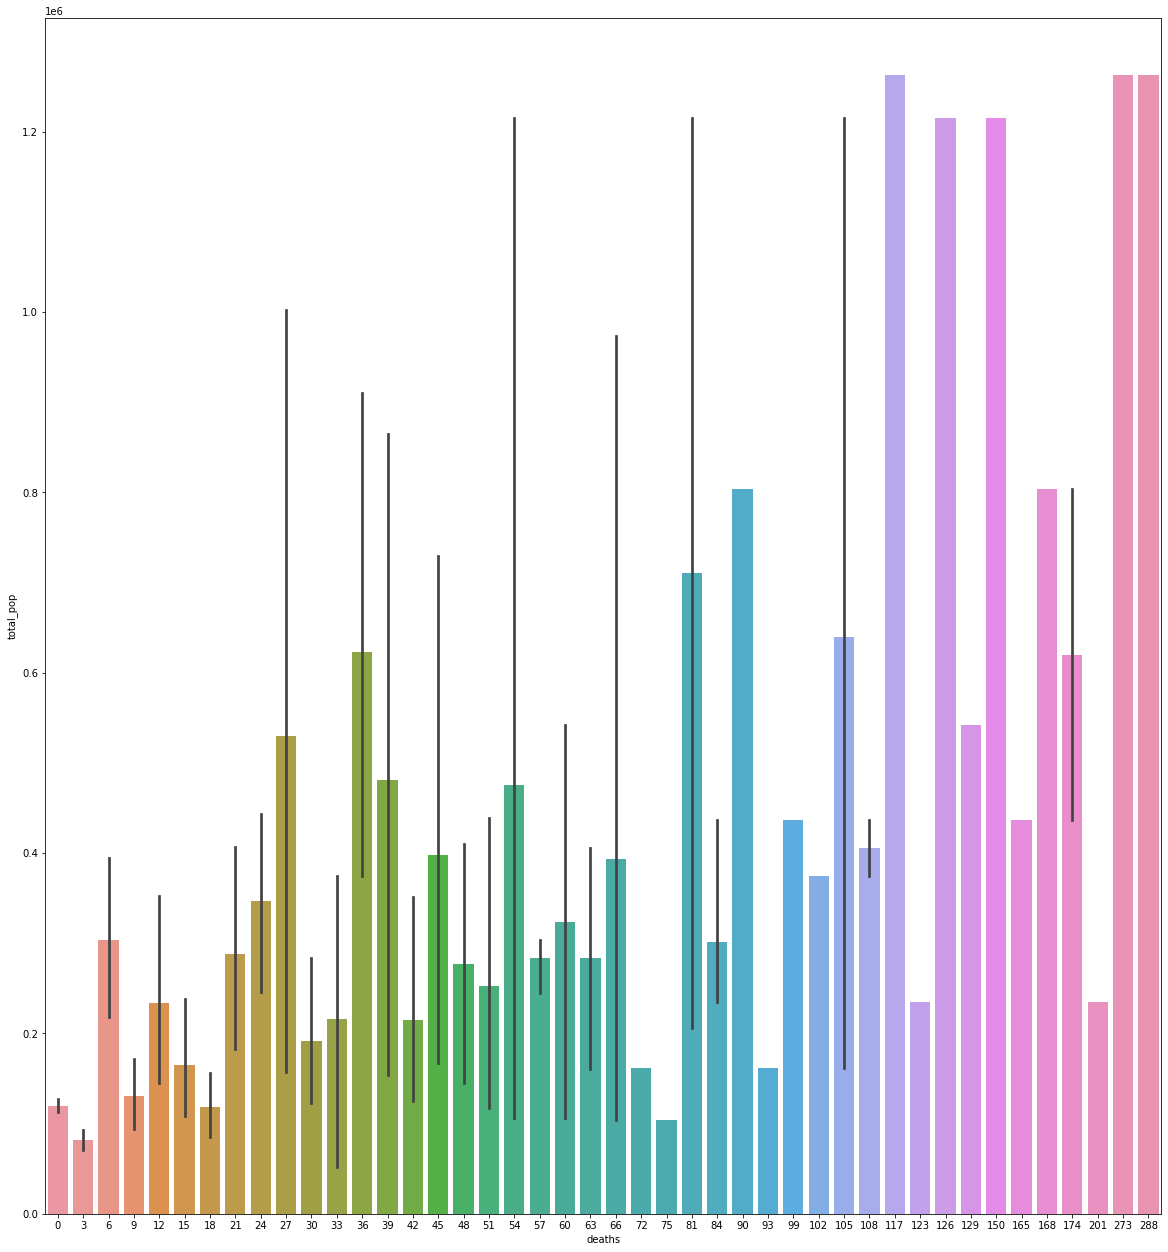

In [7]:
fig = plt.figure(figsize=(20,22))
sns.barplot(train_df['deaths'],train_df['total_pop'])
fig.show()

### Part 2 : Model Building

In [8]:
X1 = []
X1.append(train_df.columns)

In [9]:
import re
train_df['date_index_converted'] = train_df['date_index_converted'].apply(lambda x: int(re.findall('\d+', x)[0]))

In [10]:
train_df

,county,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,...,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
0,Richland,0,0,10,363,0.000000,0.000000,0.000000,0.000011,0.000151,...,55.5,7.5,675,41877,23210,90.5,48.3,15.6,103700,0.868085
1,Lawrence,119,0,105,256,0.000000,0.000000,0.000000,0.000000,0.000000,...,53.5,6.5,655,42874,23510,92.2,49.3,18.6,101500,0.954027
2,Wayne,49,0,90,769,0.000076,0.000370,0.006502,0.000039,0.000000,...,64.0,4.0,762,50383,26658,87.2,55.1,13.0,140100,0.950541
3,Fayette,7,0,85,36,0.000000,0.000000,0.000000,0.000000,0.000000,...,59.3,6.3,732,40503,25858,91.3,51.8,17.7,108900,0.940054
4,Trumbull,0,0,7,554,0.000000,0.000000,0.000000,0.000046,0.000000,...,56.4,5.9,661,43073,25800,91.7,49.1,17.2,101600,0.885724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,Summit,105,0,81,6121,0.000094,0.000491,0.008169,0.000041,0.000011,...,64.2,6.4,859,50765,28345,93.2,47.3,13.6,137000,0.791435
3137,Fayette,0,0,55,28,0.000000,0.000000,0.000000,0.000000,0.000000,...,59.3,6.3,732,40503,25858,91.3,51.8,17.7,108900,0.940054
3138,Clark,147,0,106,929,0.000013,0.000105,0.001076,0.000009,0.000012,...,60.6,7.7,736,43625,25300,92.7,48.1,16.6,107300,0.865754
3139,Logan,0,0,1,144,0.000000,0.000000,0.000000,0.000000,0.000000,...,62.5,5.8,766,49783,28346,90.7,55.2,13.7,127200,0.949363


In [11]:
# remove all the columns with object data types
train_df_new = train_df.select_dtypes(exclude=['object'])
train_df_new.head()

,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,...,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
0,0,0,10,363,0.000000,0.00000,0.000000,0.000011,0.000151,0.000053,...,55.5,7.5,675,41877,23210,90.5,48.3,15.6,103700,0.868085
1,119,0,105,256,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,53.5,6.5,655,42874,23510,92.2,49.3,18.6,101500,0.954027
2,49,0,90,769,0.000076,0.00037,0.006502,0.000039,0.000000,0.000000,...,64.0,4.0,762,50383,26658,87.2,55.1,13.0,140100,0.950541
3,7,0,85,36,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,59.3,6.3,732,40503,25858,91.3,51.8,17.7,108900,0.940054
4,0,0,7,554,0.000000,0.00000,0.000000,0.000046,0.000000,0.000000,...,56.4,5.9,661,43073,25800,91.7,49.1,17.2,101600,0.885724


In [12]:
train_df_new = train_df_new[train_df_new['date_index_converted'] > 70]

In [13]:
train_df_new

,cases,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,politics_democratic_love_jaccard,...,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
1,119,0,105,256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53.5,6.5,655,42874,23510,92.2,49.3,18.6,101500,0.954027
2,49,0,90,769,0.000076,0.000370,0.006502,0.000039,0.000000,0.000000,...,64.0,4.0,762,50383,26658,87.2,55.1,13.0,140100,0.950541
3,7,0,85,36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,59.3,6.3,732,40503,25858,91.3,51.8,17.7,108900,0.940054
5,182,0,112,71,0.000254,0.000529,0.028169,0.000331,0.000000,0.000000,...,62.4,6.6,781,46787,25751,92.6,52.6,14.7,123700,0.941699
7,196,0,104,276,0.000085,0.000604,0.007246,0.000105,0.000000,0.000000,...,62.0,4.9,722,45310,25370,90.3,54.2,13.8,117100,0.968173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,21,0,85,56,0.000000,0.000000,0.000000,0.000151,0.000000,0.000000,...,58.2,4.7,713,47075,26589,88.5,56.9,14.8,116700,0.974052
3128,56,3,111,72,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,62.7,5.0,676,42492,25833,95.0,52.6,13.5,94200,0.955155
3134,196,0,83,6535,0.000127,0.000716,0.011018,0.000030,0.000009,0.000013,...,64.2,6.4,859,50765,28345,93.2,47.3,13.6,137000,0.791435
3136,105,0,81,6121,0.000094,0.000491,0.008169,0.000041,0.000011,0.000003,...,64.2,6.4,859,50765,28345,93.2,47.3,13.6,137000,0.791435


In [14]:
test_df

,index,county,deaths,date_index_converted,county_data_length,core_jaccard,core_cosine,core_intersection,social_jaccard,politics_jaccard,...,labor_force_rate,unemployment_rate,median_housing_cost,median_household_earnings,median_worker_earnings,percent_insured,percent_married,poverty_rate,median_property_value,percent_white
0,0,Carroll,0,day_22,40,0.000000,0.000000,0.000000,0.000106,0.000000,...,58.2,4.7,713,47075,26589,88.5,56.9,14.8,116700,0.974052
1,1,Richland,3,day_118,17,0.000661,0.002567,0.058824,0.000494,0.000000,...,55.5,7.5,675,41877,23210,90.5,48.3,15.6,103700,0.868085
2,2,Portage,0,day_51,1210,0.000000,0.000000,0.000000,0.000013,0.000009,...,65.5,7.2,896,52552,25904,93.5,46.0,14.5,152000,0.909878
3,3,Auglaize,0,day_27,38,0.000000,0.000000,0.000000,0.000000,0.000000,...,67.0,3.4,758,54274,30438,95.7,59.4,9.0,143100,0.970007
4,4,Montgomery,0,day_8,4328,0.000005,0.000036,0.000462,0.000043,0.000033,...,61.8,8.0,830,43829,26292,92.0,44.8,17.9,112100,0.731997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7326,7326,Meigs,0,day_51,24,0.000000,0.000000,0.000000,0.000000,0.000473,...,52.8,10.4,571,37813,21714,91.7,51.9,22.5,87400,0.974262
7327,7327,Knox,3,day_109,128,0.000000,0.000000,0.000000,0.000033,0.000000,...,62.3,5.8,784,48533,24568,89.9,51.7,13.8,138900,0.965641
7328,7328,Columbiana,0,day_37,194,0.000000,0.000000,0.000000,0.000043,0.000000,...,58.0,7.5,656,44497,23781,91.3,52.0,15.4,104300,0.949782
7329,7329,Ashtabula,21,day_114,139,0.000000,0.000000,0.000000,0.000000,0.000000,...,54.7,7.4,695,40544,23117,90.0,47.9,19.8,106300,0.929083


In [15]:
train_df_new['cases'].value_counts()

0        334
7         73
14        71
21        66
35        48
        ... 
1218       1
1792       1
13566      1
1197       1
2821       1
Name: cases, Length: 205, dtype: int64

In [16]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor


# Split the data into X and y
X = train_df_new.drop(['cases'], axis=1)
y = train_df_new['cases']


# Apply L1 regularization with logistic regression to select features
lasso = LassoCV(cv=5, random_state=35)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
lasso.fit(X_scaled, y)
selected_features = X.columns[lasso.coef_ != 0]

# Split the data into train and test sets using only the selected features
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=35)

# Train the XGBoost model
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=35)
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Compute the R2 score
r2 = r2_score(y_test, y_pred)
print('R2 score: {:.2f}'.format(r2))

R2 score: 0.93


In [17]:
selected_features

Index(['deaths', 'date_index_converted', 'core_cosine',
       'core_cosine_normalized', 'total_pop', 'percent_25_34',
       'labor_force_rate', 'median_household_earnings'],
      dtype='object')

In [18]:
test_df['date_index_converted'] = test_df['date_index_converted'].apply(lambda x: int(re.findall('\d+', x)[0]))

# Make predictions on the test data
test_df_new = test_df[selected_features]
predicted_cases = xgb.predict(test_df_new)
predicted_cases[test_df_new['date_index_converted'] <= 70] = 0

# Create a DataFrame with the predicted values and the county names
submissions_df = pd.DataFrame({ 'Cases': predicted_cases})

# Save the DataFrame to a CSV file
submissions_df.to_csv('submissions.csv', index=False)

In [19]:
test_df_new

,deaths,date_index_converted,core_cosine,core_cosine_normalized,total_pop,percent_25_34,labor_force_rate,median_household_earnings
0,0,22,0.000000,0.000000,28361,9.7,58.2,47075
1,3,118,0.002567,0.140302,122312,12.1,55.5,41877
2,0,51,0.000000,0.000000,161897,11.1,65.5,52552
3,0,27,0.000000,0.000000,45873,11.0,67.0,54274
4,0,8,0.000036,0.001946,533763,13.1,61.8,43829
...,...,...,...,...,...,...,...,...
7326,0,51,0.000000,0.000000,23473,11.1,52.8,37813
7327,3,109,0.000000,0.000000,61004,10.8,62.3,48533
7328,0,37,0.000000,0.000000,105987,11.0,58.0,44497
7329,21,114,0.000000,0.000000,99777,11.0,54.7,40544


In [20]:
#read the sample_submission file
sample_submission = pd.read_csv('sample_submission.csv')

In [21]:
#replace Cases values with the test_df_new['cases'] values
sample_submission['Cases'] = predicted_cases
sample_submission['Cases'] = sample_submission['Cases'].round(0)
sample_submission['Cases'] = sample_submission['Cases'].mask(sample_submission['Cases'] < 0, 0)
sample_submission['Cases'] = sample_submission['Cases'].fillna(0)
sample_submission.head()

,Index,Cases
0,0,0.0
1,1,752.0
2,2,0.0
3,3,0.0
4,4,0.0


In [22]:
sample_submission.to_csv('sample_submissions.csv', index=False)